# Problem 2


In [6]:
import numpy as np

In [7]:
A = np.array([[3, 0, -1, 0],[0, 1, 0, 1], [-1, 0, 8, 1],[0, 1, 1, 1]]);
print(A)

[[ 3  0 -1  0]
 [ 0  1  0  1]
 [-1  0  8  1]
 [ 0  1  1  1]]


In [8]:
# This powermethod function outputs a pair l, w where l is the the eigenvalue and w is the eigenvector.

def powermethod(A, v, n): 
    l = np.zeros(n)
    w=(1/np.linalg.norm(v))*v
    for k in range(n):
        v = A @ w
        newl = np.dot(v,w)
        l[k] = newl
        w=(1/np.linalg.norm(v))*v
    return l,w

We use the powermethod to find $e_1$ and $\lambda_1$

In [9]:
n,n = np.shape(A) # should be square
v0 = np.random.rand(n)
elist1, v1 = powermethod(A,v0,20)
l1 = elist1[-1]

print("Lambda1 =",l1, "\n v_1 = ", v1)

Lambda1 = 8.32680562975727 
 v_1 =  [-0.18277562  0.01848086  0.97361021  0.13540568]


In [12]:
np.isclose(A @ v1, l1*v1)

array([ True,  True,  True,  True])

### The First Eigenvector/Eigenvalue pair 
So we have $e_1 \approx \begin{pmatrix}-0.182 \\ 0.018 \\ 0.973 \\ 0.135\end{pmatrix}$ and $\lambda_1 \approx 8.33$

In [21]:
# this does the powermethod on A-sI
def powermethodshift(A, v, s, n):
    m,m = A.shape
    B = A - s*np.eye(m,m)
    l = np.zeros(n)
    w=(1/np.linalg.norm(v))*v
    for k in range(n):
        v = B @ w
        newl = np.dot(v,w)
        l[k] = newl
        w=(1/np.linalg.norm(v))*v
    return l+ s,w

If we set $B=A-\lambda_1 I$ then $B$ has the same eigenvectors as $A$ but the eigenvalues are shifted back by $\lambda_1$.  This means that the principal eigenvector of $B$ is gauranteed to be something other than $e_1$ ($e_1$ is an eigenvector of $B$ with eigenvalue $0$).  So, we'll find a second eigenvector of $A$ this way.

In [22]:
elist2, v2 = powermethodshift(A,v0,l1,80)
l2 = elist2[-1] 

print("Lambda2 =",l2, "\n e_2 = ", v2)

Lambda2 = -0.0666785904540319 
 e_2 =  [ 0.03058325  0.68060099  0.093789   -0.72598249]


In [23]:
print(A @ v2 - l2*v2)


[-1.74469706e-09  1.08596754e-08 -1.90512418e-09  9.86121242e-09]


### The Second Eigenvector/Eigenvalue pair 
So we have $e_2 \approx \begin{pmatrix}0.035 \\ 0.681 \\ 0.94 \\ -0.726\end{pmatrix}$ and $\lambda_1 \approx -0.067$

In [24]:
# this does the powermethod on (A-sI)^{-1}
def invpowermethodshift(A, v, s, n):
    m,m = A.shape
    B = np.linalg.inv(A - s*np.eye(m,m))
    l = np.zeros(n)
    w=(1/np.linalg.norm(v))*v
    for k in range(n):
        v = B @ w
        newl = 1/np.dot(v,w)
        l[k] = newl
        w=(1/np.linalg.norm(v))*v
    return l+s,w

The operator $(A-sI)^{-1}$ has the same eigenvectors as $A$, but the corresponding eigenvalues are $\frac{1}{\lambda-s}$, which has the greatest magnitude when $\lambda \approx s$.  So, the power method on this operator will find the eigenvector of $A$ whose eigenvalue is closest to $s$.  We can look for an eigenvector whose eigenvalue is imbetween $\lambda_1$ and $\lambda_2$ by using this shifted inverse power method function with shift equal to the midpoint of $\lambda_1$ and $\lambda_2$. 

In [25]:
elist3, v3 = invpowermethodshift(A,v0,(l1+l2)/2,80)
l3 = elist3[-1] 

In [26]:
print(l3, "\n", v3)

2.8318153216290556 
 [0.97567239 0.06966243 0.16409315 0.1276087 ]


In [27]:
print(A @ v3 - l3*v3)

[-4.44089210e-16  2.77555756e-17  0.00000000e+00  0.00000000e+00]


### The Third Eigenvector/Eigenvalue pair 
So we have $e_3 \approx \begin{pmatrix}0.976 \\ 0.070 \\ 0.164 \\ 0.128\end{pmatrix}$ and $\lambda_1 \approx 2.832$

Let's take stock

In [30]:
print(l1, l2, l3)

8.32680562975727 -0.0666785904540319 2.8318153216290556


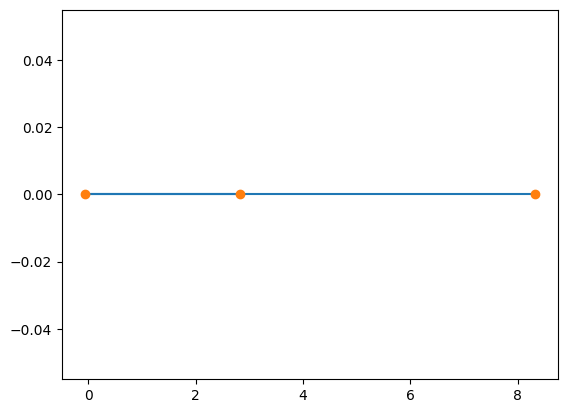

In [31]:
import matplotlib.pyplot as plt

xpoints = np.array([l1, l2, l3])
ypoints = np.array([0,0,0])


plt.plot(xpoints, ypoints)
plt.plot(xpoints, ypoints, 'o')
plt.show()

Looking for an eigenvector with an eigenvalue between $\lambda_2$ and $\lambda_3$, we find the last eigenvector, eigenvalue pair

In [32]:
elist4, v4 = invpowermethodshift(A, v0, (l2 + l3)/2, 30)
l4 = elist4[-1]

In [35]:
np.isclose(A @ v4, l4*v4)

array([ True,  True,  True,  True])